# Marvel Cinematic Universe Machine Learning

Import dependencies

In [1]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('machine_learning_marvel.csv', index_col = "movie_name")
data.head()

,movie_code,domestic_gross,international_gross,worldwide_gross,Number of Theaters,Number of Weeks,Budget,Captain America,Iron Man,Black Widow,...,Hawkeye,Nick Fury,Vision,Spider-Man,Star Lord,Wanda,Ant-Man,Doctor Strange,Black Panther,Captain Marvel
movie_name,,,,,,,,,,,,,,,,,,,,,
Iron Man,1,318604126,266762121,585366247,4154,139,140000000,0,1,0,...,0,1,1,0,0,0,0,0,0,0
The Incredible Hulk,2,134806913,129964083,264770996,3508,28,150000000,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Iron Man 2,3,312433331,311500000,623933331,4390,34,200000000,0,1,1,...,0,1,1,1,0,0,0,0,0,0
Thor,4,181030624,268295994,449326618,3963,34,150000000,0,0,0,...,1,1,0,0,0,0,0,0,0,0
Captain America: The First Avenger,5,176654505,193915269,370569774,3715,24,140000000,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [3]:
data.dtypes

movie_code             int64
domestic_gross         int64
international_gross    int64
worldwide_gross        int64
Number of Theaters     int64
Number of Weeks        int64
Budget                 int64
Captain America        int64
Iron Man               int64
Black Widow            int64
Thor                   int64
Hulk                   int64
Hawkeye                int64
Nick Fury              int64
Vision                 int64
Spider-Man             int64
Star Lord              int64
Wanda                  int64
Ant-Man                int64
Doctor Strange         int64
Black Panther          int64
Captain Marvel         int64
dtype: object

In [4]:
data.corr()

,movie_code,domestic_gross,international_gross,worldwide_gross,Number of Theaters,Number of Weeks,Budget,Captain America,Iron Man,Black Widow,...,Hawkeye,Nick Fury,Vision,Spider-Man,Star Lord,Wanda,Ant-Man,Doctor Strange,Black Panther,Captain Marvel
movie_code,1.000000,0.490507,0.557154,0.547438,0.546470,-0.290002,0.376755,0.132221,-0.134304,0.110096,...,-0.063564,-0.236189,-0.341882,0.358249,0.311272,0.222475,0.328564,0.556187,0.415029,0.441980
domestic_gross,0.490507,1.000000,0.877682,0.941359,0.688441,-0.050497,0.821977,0.349708,0.503570,0.532755,...,0.379166,0.178582,0.305740,0.398777,0.476858,0.455759,0.106135,0.348099,0.716083,0.480409
international_gross,0.557154,0.877682,1.000000,0.987796,0.701152,-0.179728,0.912021,0.470630,0.524451,0.571564,...,0.463496,0.195861,0.254323,0.498046,0.516211,0.639470,0.286356,0.528022,0.654959,0.553711
worldwide_gross,0.547438,0.941359,0.987796,1.000000,0.715396,-0.142476,0.910133,0.441286,0.534772,0.571335,...,0.450552,0.193126,0.280228,0.481382,0.519300,0.599007,0.236792,0.485626,0.694886,0.536494
Number of Theaters,0.546470,0.688441,0.701152,0.715396,1.000000,-0.091842,0.613286,0.190895,0.559055,0.457298,...,0.267963,0.167003,0.355081,0.643003,0.393362,0.305663,0.138595,0.364475,0.315824,0.367496
Number of Weeks,-0.290002,-0.050497,-0.179728,-0.142476,-0.091842,1.000000,-0.190355,-0.231768,0.082732,-0.202772,...,-0.178393,-0.026215,0.182107,-0.268043,0.035782,-0.156661,-0.243280,0.012850,-0.101384,-0.052284
Budget,0.376755,0.821977,0.912021,0.910133,0.613286,-0.190355,1.000000,0.463320,0.619769,0.646903,...,0.508286,0.176258,0.405394,0.556388,0.580495,0.740067,0.269901,0.424002,0.747257,0.369406
Captain America,0.132221,0.349708,0.470630,0.441286,0.190895,-0.231768,0.463320,1.000000,0.375046,0.648519,...,0.388290,0.312986,0.182323,0.277893,0.060363,0.600925,0.060363,-0.036980,0.291756,0.351866
Iron Man,-0.134304,0.503570,0.524451,0.534772,0.559055,0.082732,0.619769,0.375046,1.000000,0.536745,...,0.441358,0.232621,0.824958,0.538077,0.102190,0.441358,0.102190,0.009391,0.337227,0.068732
Black Widow,0.110096,0.532755,0.571564,0.571335,0.457298,-0.202772,0.646903,0.648519,0.536745,1.000000,...,0.500370,0.516459,0.508923,0.397706,0.146599,0.721688,0.146599,0.057735,0.387440,0.422577


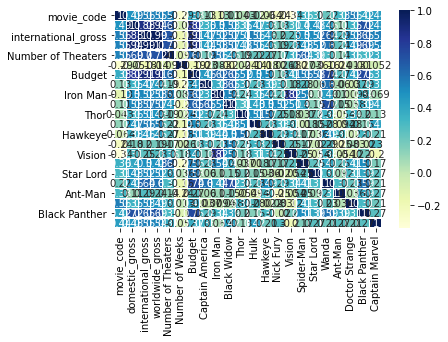

In [5]:
heat_map = sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, linewidths = 0.2)

figure = heat_map.get_figure()    
figure.savefig('../static/Images/mcu_heat_map.png', dpi=400)

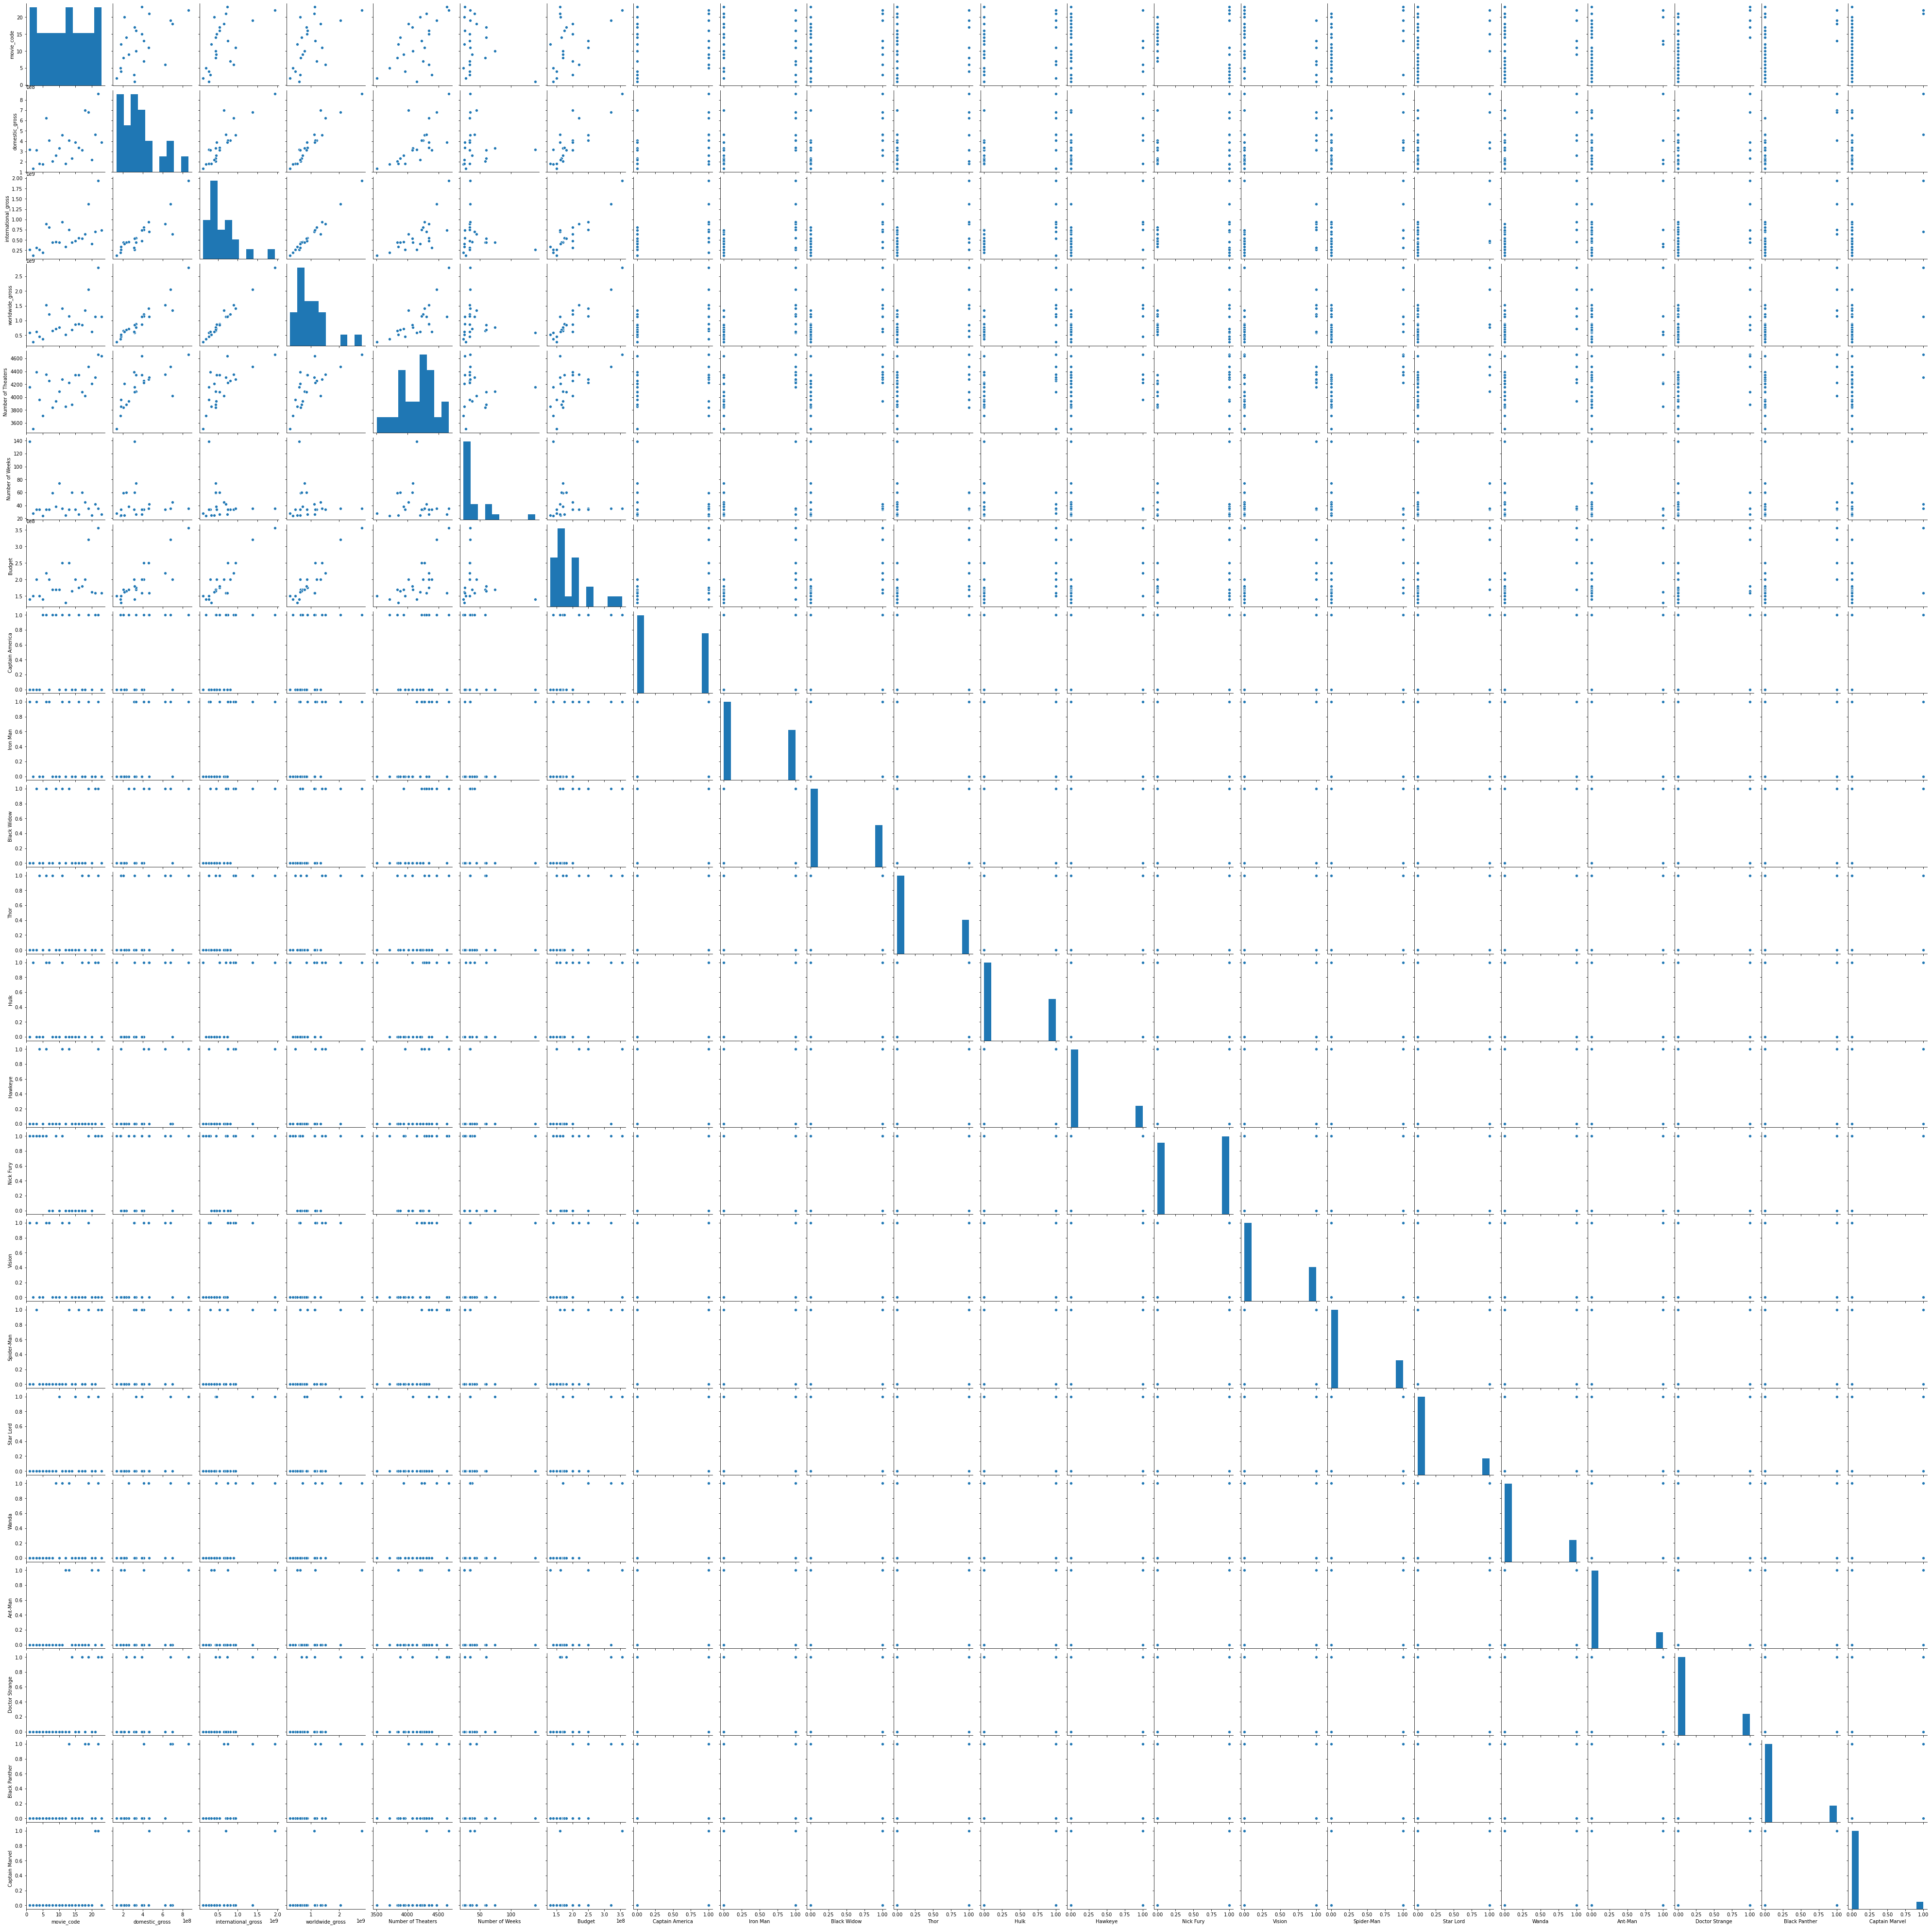

In [6]:
import seaborn as sb
mcu_seaborn = sb.pairplot(data)
mcu_seaborn

In [7]:
mcu_seaborn.savefig('../static/Images/mcu_pairplot.png', dpi=400)

In [84]:
train_data = data.sample(frac=0.8, random_state=42)
train_data.index
test_data = data.drop(train_data.index)

In [85]:
train_data.index

Index(['Spider-Man: Homecoming', 'Guardians of the Galaxy', 'Iron Man',
       'Captain American: The Winter Soldier', 'Black Panther',
       'Captain America: Civil War', 'The Incredible Hulk', 'Doctor Strange',
       'The Avengers', 'Iron Man 2', 'Ant-Man', 'Captain Marvel', 'Thor',
       'Captain America: The First Avenger', 'Avengers: Infinity War',
       'Thor: Ragnarok', 'Avengers: Endgame', 'Spider-Man: Far From Home'],
      dtype='object', name='movie_name')

In [86]:
test_data.index

Index(['Iron Man 3', 'Thor: The Dark World', 'Avengers: Age of Ultron',
       'Guardians of the Galaxy Vol. 2', 'Ant-Man and the Wasp'],
      dtype='object', name='movie_name')

In [87]:
mcu_vars = train_data[['Budget', 'Number of Theaters', 'Number of Weeks']]
mcu_vars

,Budget,Number of Theaters,Number of Weeks
movie_name,,,
Spider-Man: Homecoming,175000000,4348,26
Guardians of the Galaxy,170000000,4088,74
Iron Man,140000000,4154,139
Captain American: The Winter Soldier,170000000,3938,38
Black Panther,200000000,4020,45
Captain America: Civil War,250000000,4226,34
The Incredible Hulk,150000000,3508,28
Doctor Strange,165000000,3882,60
The Avengers,220000000,4349,34


In [88]:
from sklearn.linear_model import LinearRegression
split_mcu_model = LinearRegression()
split_mcu_model.fit(X = mcu_vars, y = train_data['worldwide_gross'])

LinearRegression()

In [89]:
print('Intercept: ', split_mcu_model.intercept_)
print(' ')
print('Co-efficients: ', split_mcu_model.coef_)
print(' ')

Intercept:  -2801578509.469262
 
Co-efficients:  [7.62807110e+00 5.61904801e+05 1.66136360e+05]
 


In [90]:
test_df = test_data[['Budget', 'Number of Theaters', 'Number of Weeks']]
test_df

,Budget,Number of Theaters,Number of Weeks
movie_name,,,
Iron Man 3,200000000,4253,34
Thor: The Dark World,170000000,3841,59
Avengers: Age of Ultron,250000000,4276,35
Guardians of the Galaxy Vol. 2,200000000,4347,34
Ant-Man and the Wasp,162000000,4206,25


In [91]:
predictions = split_mcu_model.predict(X=test_df)
print(predictions)

[1.11946547e+09 6.63271964e+08 1.51395897e+09 1.17228452e+09
 8.01694012e+08]


In [92]:
for i in predictions:
 print('$' + format(i, ',.2f'))

$1,119,465,466.50
$663,271,964.41
$1,513,958,968.22
$1,172,284,517.83
$801,694,011.85


In [93]:
split_mcu_model.score(X = mcu_vars, y = train_data['worldwide_gross'])

0.8784163339995851

In [94]:
test_data['Projected Gross'] = predictions
test_data

,movie_code,domestic_gross,international_gross,worldwide_gross,Number of Theaters,Number of Weeks,Budget,Captain America,Iron Man,Black Widow,...,Nick Fury,Vision,Spider-Man,Star Lord,Wanda,Ant-Man,Doctor Strange,Black Panther,Captain Marvel,Projected Gross
movie_name,,,,,,,,,,,,,,,,,,,,,
Iron Man 3,7,409013994,805797258,1214811252,4253,34,200000000,0,1,0,...,0,1,0,0,0,0,0,0,0,1.119465e+09
Thor: The Dark World,8,206362140,438421000,644783140,3841,59,170000000,1,0,0,...,0,0,0,0,0,0,0,0,0,6.632720e+08
Avengers: Age of Ultron,11,459005868,943800000,1402805868,4276,35,250000000,1,1,1,...,1,1,0,0,1,0,0,0,0,1.513959e+09
Guardians of the Galaxy Vol. 2,15,389813101,473942950,863756051,4347,34,200000000,0,0,0,...,0,0,0,1,0,0,0,0,0,1.172285e+09
Ant-Man and the Wasp,20,216648740,406025399,622674139,4206,25,162000000,0,0,0,...,0,0,0,0,0,1,0,0,0,8.016940e+08


No handles with labels found to put in legend.


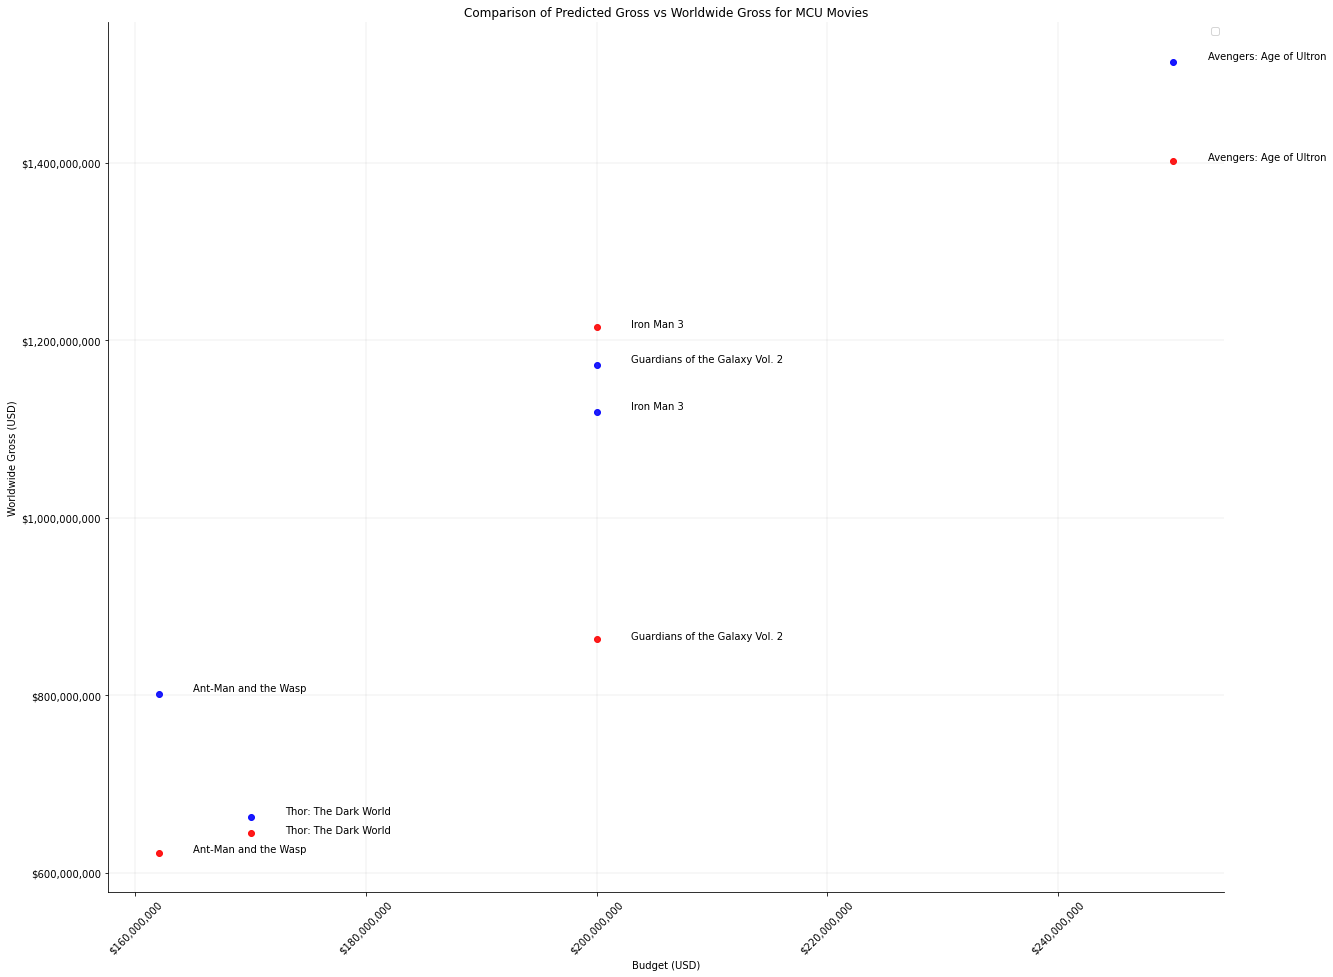

<Figure size 432x288 with 0 Axes>

In [106]:
import matplotlib.ticker as mtick
def scatterplot(df, x_dim, y_dim, z_dim):
    x= df[x_dim]
    y= df[y_dim]
    z= df[z_dim]

    fig, ax = plt.subplots(figsize=(20,16))

    #define color array
    colors = ['red', 'blue']

    #customize transparency for each dot in the scatter plot 

    #plot each x-y
    ax.scatter(x, y, alpha=0.9, color=colors[0])
    ax.scatter(x, z, alpha=0.9, color=colors[1])

    #add title and axes labels
    ax.set_title('Comparison of Predicted Gross vs Worldwide Gross for MCU Movies')
    ax.set_xlabel('Budget (USD)')
    ax.set_ylabel('Worldwide Gross (USD)')

    #remove top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    #add major gridlines
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

    #Change y-axis label style and include Currency format
    ax.ticklabel_format(style='plain', useOffset=False, axis='y')
    fmt = '${x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick)

    #Change x-axis label style and include Currency format
    ax.ticklabel_format(style='plain', useOffset=False, axis='x')
    fmt = '${x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.xaxis.set_major_formatter(tick)
    plt.xticks(rotation=45)

    #add Legend
    ax.legend()

    for i in test_data.index: 
        plt.text(test_data['Budget'][i]+3000000.0, test_data['Projected Gross'][i]+3000000.0, i)
        plt.text(test_data['Budget'][i]+3000000.0, test_data['worldwide_gross'][i], i)
        
    fig.set_canvas(plt.gcf().canvas)

    plt.show()
 
comp_plot = scatterplot(test_data, 'Budget', 'worldwide_gross', 'Projected Gross')
plt.savefig('../static/Images/mcu_sample_predictions.png', dpi=400)

In [21]:
X = data[["international_gross", "worldwide_gross"]].values.reshape(-1, 2)
y = data["domestic_gross"].values.reshape(-1, 1)

In [22]:
print("Shape: ", X.shape, y.shape)

Shape:  (23, 2) (23, 1)


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [27]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9981929233757024
Testing Score: 0.9988856673888891


Text(0.5, 1.0, 'Domestic Gross: Actual Vs. Predicted')

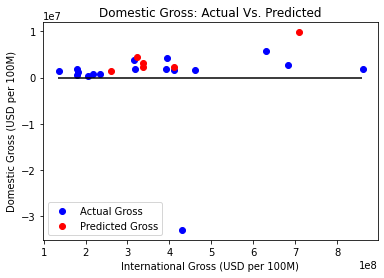

In [28]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Actual Gross")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="red", label="Predicted Gross")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.xlabel('International Gross (USD per 100M)')
plt.ylabel('Domestic Gross (USD per 100M)')
plt.title("Domestic Gross: Actual Vs. Predicted")